In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


model = keras.Sequential(
    [
        keras.layers.Dense(128, activation="relu", input_shape=(784,)),
        keras.layers.Dense(10, activation="softmax"),
    ]
)


model.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8601 - loss: 0.4797 - val_accuracy: 0.9532 - val_loss: 0.1661
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9594 - loss: 0.1365 - val_accuracy: 0.9654 - val_loss: 0.1164
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9734 - loss: 0.0898 - val_accuracy: 0.9674 - val_loss: 0.1078
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9803 - loss: 0.0661 - val_accuracy: 0.9705 - val_loss: 0.0958
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9858 - loss: 0.0499 - val_accuracy: 0.9718 - val_loss: 0.0939


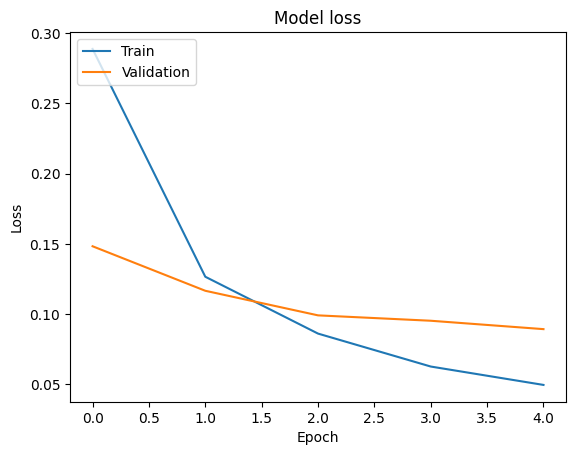

Test Loss: 0.0758
Test Accuracy: 0.9754
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


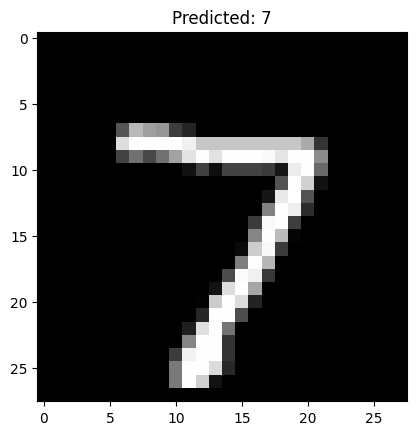

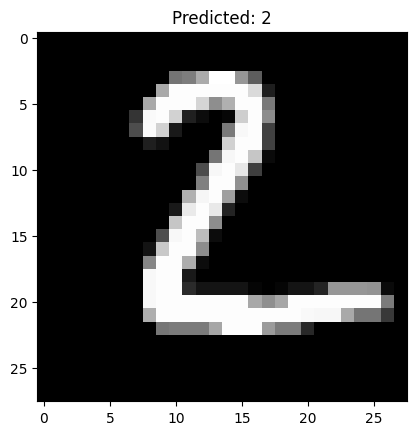

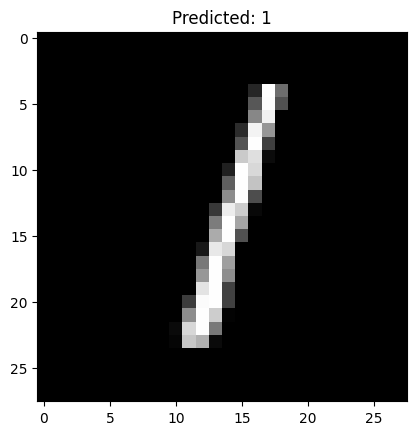

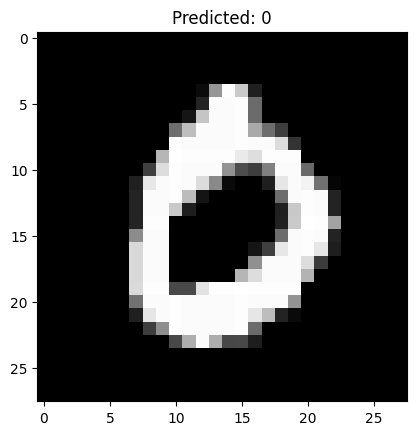

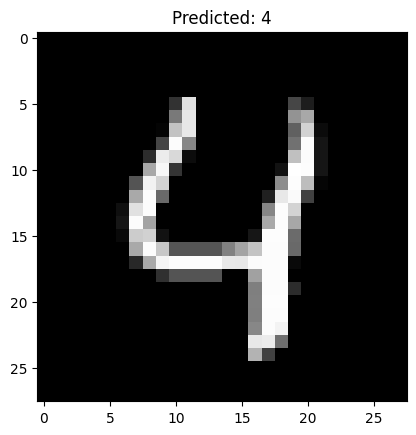

In [36]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
num_samples = 5
for i in range(num_samples):
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.show()